In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math


### Carga de datos

In [20]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'gdc'
input_path = f'{station}_2006_2024_hours_output.csv'
cols = ['identificacion', 'ddd', 'dddstd', 'dddx', 'fhora', 'hr', 'lluv', 'pres', 'temp', 'ts', 'vel', 'velx']
date_time = 'fhora'

df = pd.read_csv(f'data_{station}/{input_path}', parse_dates=[date_time])
df = df[cols]

df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156578 entries, 0 to 156577
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   identificacion  156578 non-null  int64              
 1   ddd             121936 non-null  float64            
 2   dddstd          86363 non-null   float64            
 3   dddx            98265 non-null   float64            
 4   fhora           156578 non-null  datetime64[ns, UTC]
 5   hr              107923 non-null  float64            
 6   lluv            156578 non-null  float64            
 7   pres            118719 non-null  float64            
 8   temp            106147 non-null  float64            
 9   ts              103653 non-null  float64            
 10  vel             123848 non-null  float64            
 11  velx            123466 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(1)
memory usage: 14.3 MB


### Ventana móvil

In [21]:

window_size = 365 * 24  
nulls_tolerance = 7 * 24 * 2 # 2 semanas horario
value_counts = pd.DataFrame()

#Nos saltamos la columna de fecha e identificacion de la base
for col in df.columns:
    if df[col].dtype != np.float64 and df[col].dtype != np.int64:        
        print(f'{col} is not a number')
        continue
    print(f'{col} is a number')
    df[f'{station}_{col}'] = df[col].rolling(window=window_size, min_periods=1).apply(
        lambda x: 0 if x.isnull().sum() > nulls_tolerance else 1
    )

    value_counts[col] = df[f'{station}_{col}'].value_counts().reindex([0, 1], fill_value=0)



print(df.head(20))



identificacion is a number
ddd is a number
dddstd is a number
dddx is a number
fhora is not a number
hr is a number
lluv is a number
pres is a number
temp is a number
ts is a number
vel is a number
velx is a number
    identificacion    ddd  dddstd  dddx                     fhora  hr  lluv  \
0            89070  346.0     NaN   NaN 2006-01-02 00:00:00+00:00 NaN   0.0   
1            89070  335.0     NaN   NaN 2006-01-02 01:00:00+00:00 NaN   0.0   
2            89070  344.0     NaN   NaN 2006-01-02 02:00:00+00:00 NaN   0.0   
3            89070  341.0     NaN   NaN 2006-01-02 03:00:00+00:00 NaN   0.0   
4            89070  345.0     NaN   NaN 2006-01-02 04:00:00+00:00 NaN   0.0   
5            89070    1.0     NaN   NaN 2006-01-02 05:00:00+00:00 NaN   0.0   
6            89070    6.0     NaN   NaN 2006-01-02 06:00:00+00:00 NaN   0.0   
7            89070    9.0     NaN   NaN 2006-01-02 07:00:00+00:00 NaN   0.0   
8            89070    3.0     NaN   NaN 2006-01-02 08:00:00+00:00 NaN   0.

In [4]:
print(df.head(20))


    identificacion    ddd  dddstd  dddx                     fhora  hr  lluv  \
0            89070  346.0     NaN   NaN 2006-01-02 00:00:00+00:00 NaN   0.0   
1            89070  335.0     NaN   NaN 2006-01-02 01:00:00+00:00 NaN   0.0   
2            89070  344.0     NaN   NaN 2006-01-02 02:00:00+00:00 NaN   0.0   
3            89070  341.0     NaN   NaN 2006-01-02 03:00:00+00:00 NaN   0.0   
4            89070  345.0     NaN   NaN 2006-01-02 04:00:00+00:00 NaN   0.0   
5            89070    1.0     NaN   NaN 2006-01-02 05:00:00+00:00 NaN   0.0   
6            89070    6.0     NaN   NaN 2006-01-02 06:00:00+00:00 NaN   0.0   
7            89070    9.0     NaN   NaN 2006-01-02 07:00:00+00:00 NaN   0.0   
8            89070    3.0     NaN   NaN 2006-01-02 08:00:00+00:00 NaN   0.0   
9            89070    2.0     NaN   NaN 2006-01-02 09:00:00+00:00 NaN   0.0   
10           89070  341.0     NaN   NaN 2006-01-02 10:00:00+00:00 NaN   0.0   
11           89070  344.0     NaN   NaN 2006-01-02 1

In [5]:
# Exportación

df.to_csv(f'data_{station}/{station}_flagged.csv', index=False)

### Visualización de los datos

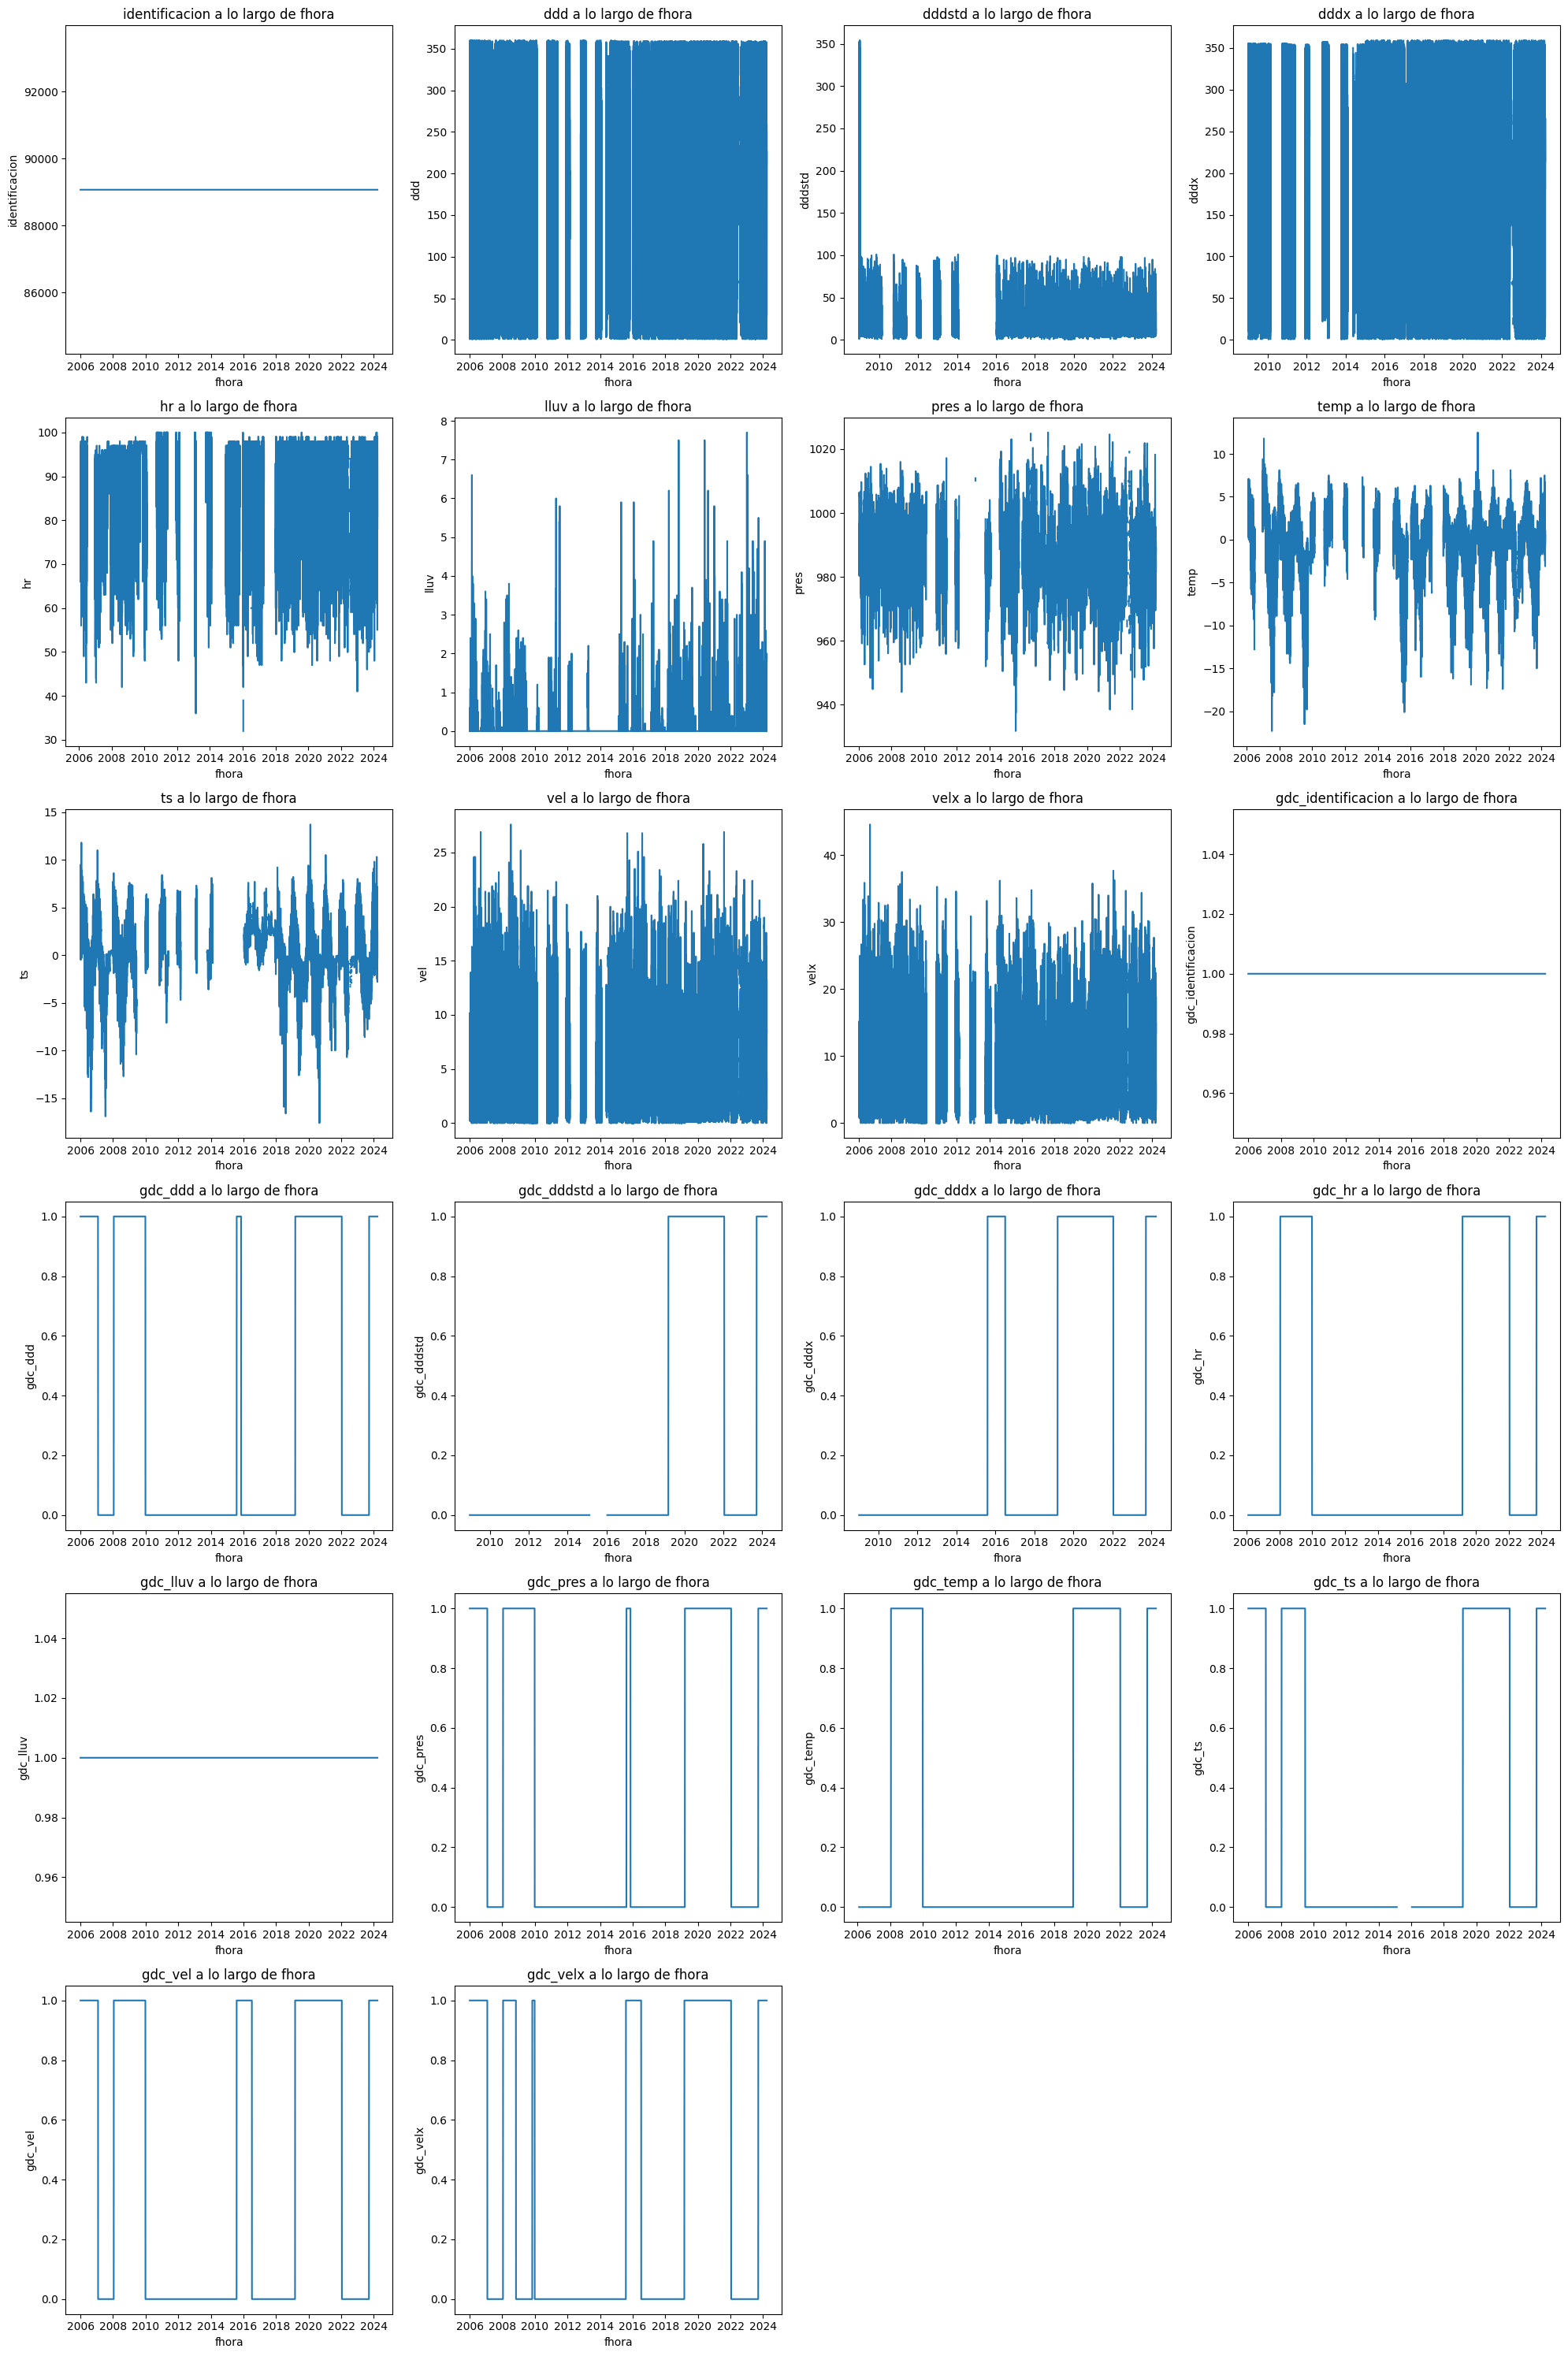

In [10]:
import math

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('fhora')):
    ax.plot(df['fhora'], df[col])
    ax.set_xlabel('fhora')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.savefig('flagged_period.png')

plt.show()

### Generación de Heatmap

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_21820\2283525558.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_flags.index = df_flags.index.to_period('M')


gdc_identificacion procede al mapa de calor
gdc_ddd procede al mapa de calor
gdc_dddstd procede al mapa de calor
gdc_dddx procede al mapa de calor
gdc_hr procede al mapa de calor
gdc_lluv procede al mapa de calor
gdc_pres procede al mapa de calor
gdc_temp procede al mapa de calor
gdc_ts procede al mapa de calor
gdc_vel procede al mapa de calor
gdc_velx procede al mapa de calor


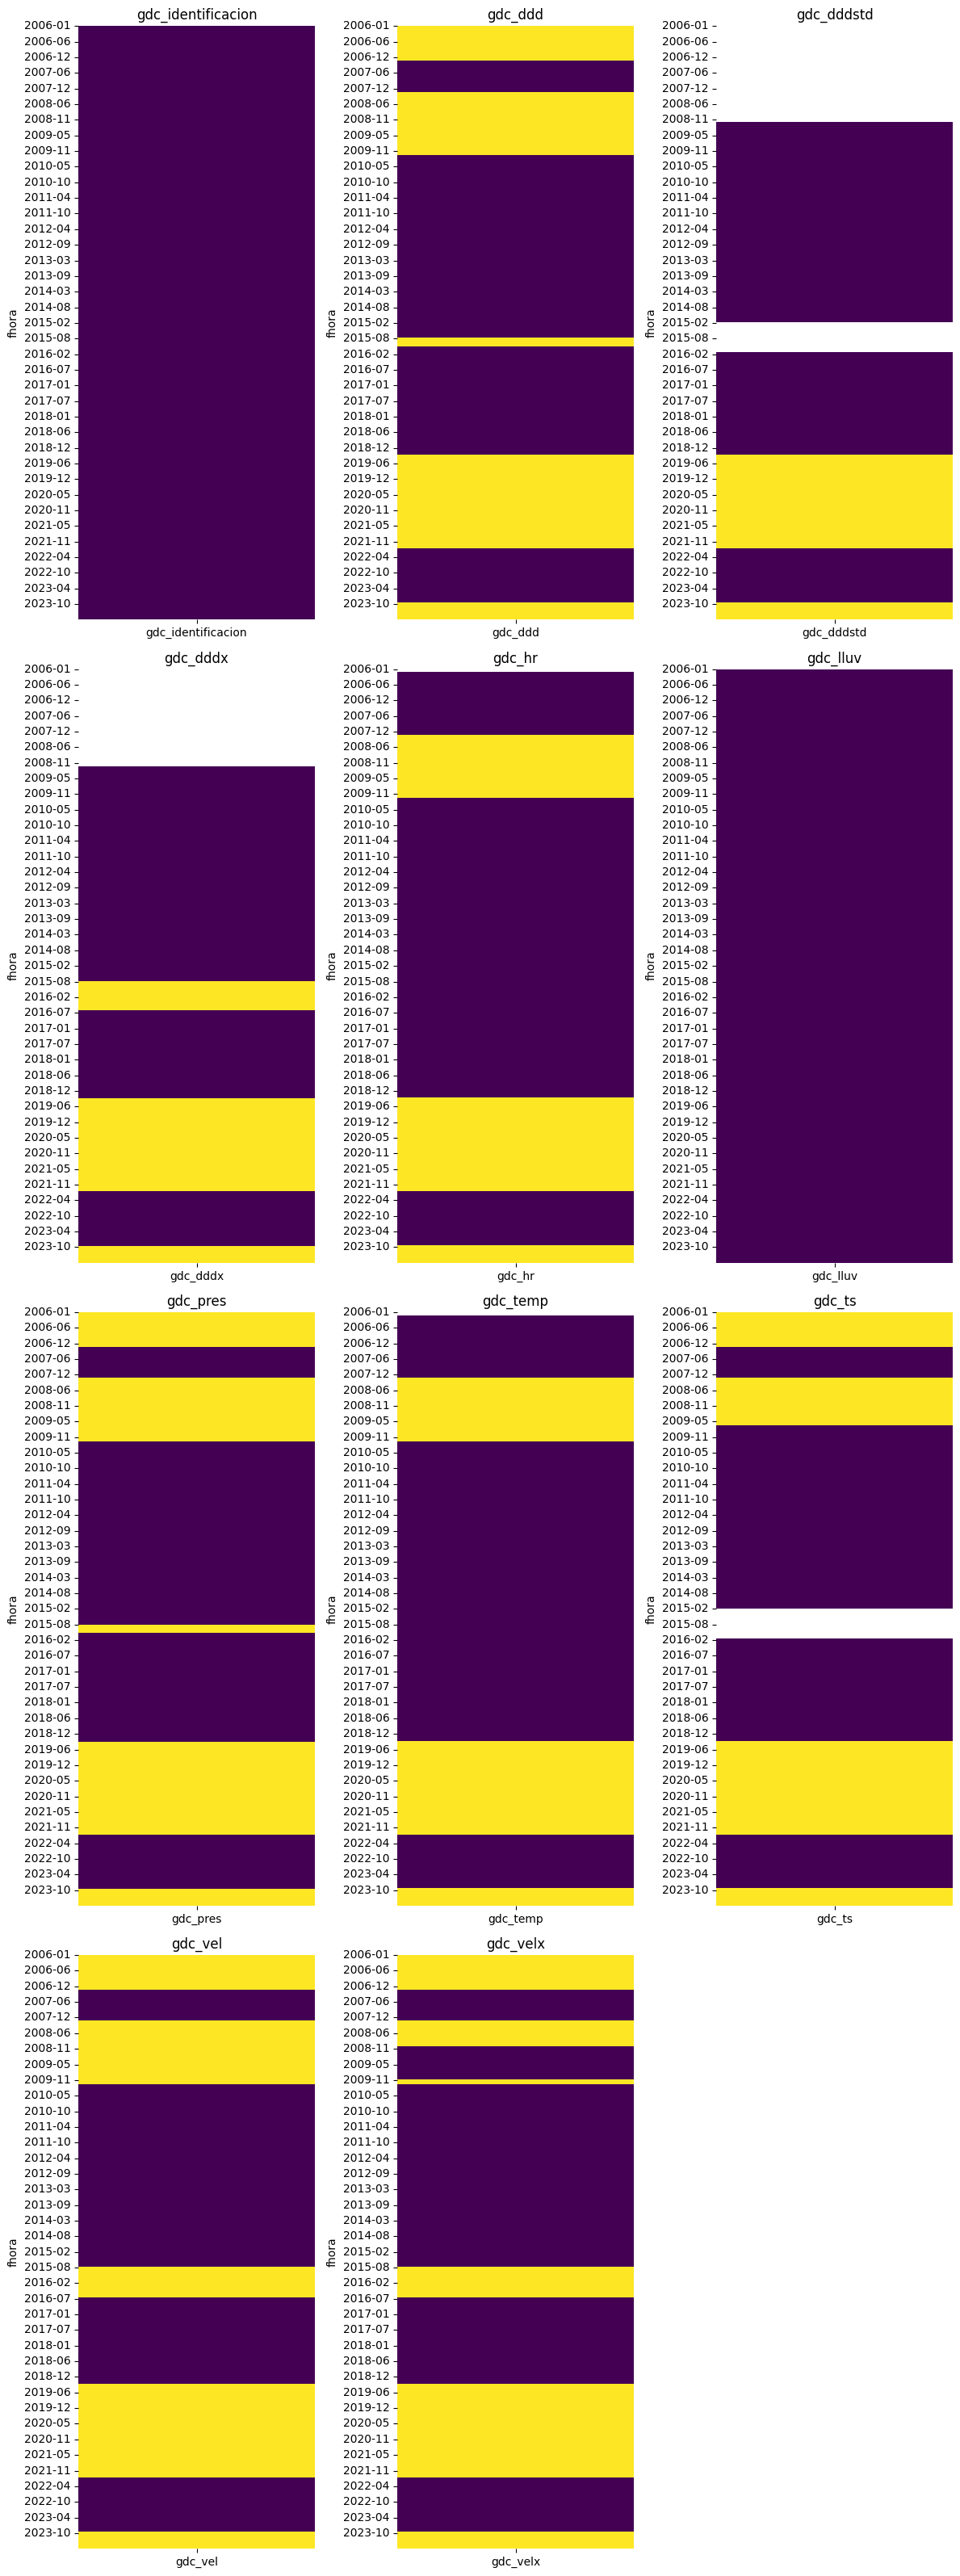

,identificacion,ddd,dddstd,dddx,hr,lluv,pres,temp,ts,vel,...,gdc_ddd,gdc_dddstd,gdc_dddx,gdc_hr,gdc_lluv,gdc_pres,gdc_temp,gdc_ts,gdc_vel,gdc_velx
fhora,,,,,,,,,,,,,,,,,,,,,
2006-01-02 00:00:00+00:00,89070,346.0,NaN,NaN,NaN,0.0,1005.2,NaN,1.8,9.2,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
2006-01-02 01:00:00+00:00,89070,335.0,NaN,NaN,NaN,0.0,1005.4,NaN,1.7,8.3,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
2006-01-02 02:00:00+00:00,89070,344.0,NaN,NaN,NaN,0.0,1005.6,NaN,1.7,8.7,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
2006-01-02 03:00:00+00:00,89070,341.0,NaN,NaN,NaN,0.0,1005.8,NaN,1.7,7.4,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
2006-01-02 04:00:00+00:00,89070,345.0,NaN,NaN,NaN,0.0,1006.1,NaN,1.6,5.8,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0


In [26]:

df_flags = df[[col for col in df.columns if col.startswith(f'{station}')]]
df_flags.index = df_flags.index.to_period('M') 

num_cols = sum(col.startswith(f'{station}') for col in df_flags.columns)
num_rows = math.ceil(num_cols / 3)  


fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas y generar gráficos
for ax, col in zip(axes, df_flags.columns):
    if col.startswith(f'{station}'):
        print(f'{col} procede al mapa de calor')
        sns.heatmap(df_flags[[col]], cbar=False, cmap='viridis', ax=ax)
        ax.set_title(col)
    else:
        print(col)

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 3
if num_cols % 3:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.savefig('heatmap_figure.png')
plt.show()

df.head()

In [41]:
df_seleccion_periodo = df[['gdc_ts', 'ts']].loc['2015-01-01':'2015-03-01']
df_seleccion_periodo.to_csv('periodo_seleccionado.csv')

### Código para examinar una sola columna de forma individual

In [5]:
df_2006 = pd.read_json(f'data_{station}/{station}_2006.json')
df_2006.head()

,identificacion,nombre,latitud,longitud,altitud,srs,alt_nieve,ddd,dddstd,dddx,...,global,ir_solar,neta,par,tcielo,ttierra,uvab,uvb,uvi,qdato
0,89070,GdC Estacion meteorologica,-62.97697,-60.67528,12,WGS84,0,334,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89070,GdC Estacion meteorologica,-62.97697,-60.67528,12,WGS84,0,333,0,0,...,0,0,0,0,0,0,0,0,0,0
2,89070,GdC Estacion meteorologica,-62.97697,-60.67528,12,WGS84,0,340,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89070,GdC Estacion meteorologica,-62.97697,-60.67528,12,WGS84,0,342,0,0,...,0,0,0,0,0,0,0,0,0,0
4,89070,GdC Estacion meteorologica,-62.97697,-60.67528,12,WGS84,0,343,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
target = 'lluv'

plt.figure(figsize=(10, 6))
plt.plot(df_2006['fhora'], df_2006[f'{target}'])
plt.xlabel('fhora')
plt.ylabel(f'{target}')
plt.title(f'{target} a lo largo de fhora')
plt.show()